In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/tmdb_5000_movies.csv")

In [2]:
roi_df = df[(df["budget"] > 0) & (df["revenue"] > 0)].copy()

In [3]:
roi_df["roi"] = roi_df["revenue"] / roi_df["budget"]

In [4]:
top_roi = roi_df.sort_values("roi", ascending=False).head(10)
top_roi[["title", "budget", "revenue", "roi"]]

,title,budget,revenue,roi
4238,Modern Times,1,8500000,8.500000e+06
3137,Nurse 3-D,10,10000000,1.000000e+06
4577,Paranormal Activity,15000,193355800,1.289039e+04
4582,Tarnation,218,1162014,5.330339e+03
4496,The Blair Witch Project,60000,248000000,4.133333e+03
4724,Eraserhead,10000,7000000,7.000000e+02
4788,Pink Flamingos,12000,6000000,5.000000e+02
4742,Super Size Me,65000,28575078,4.396166e+02
4723,The Gallows,100000,42664410,4.266441e+02
4514,Open Water,130000,54667954,4.205227e+02


C:\Users\Ensar\AppData\Local\Temp\ipykernel_13600\1267894479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_roi["roi"], y=filtered_roi["title"], palette="cubehelix")


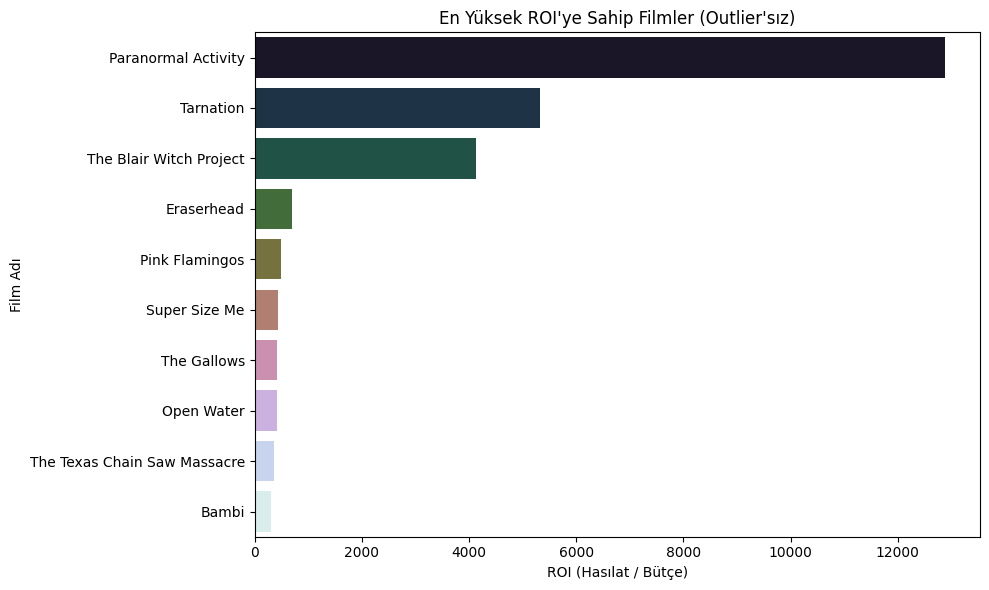

In [5]:
# Aşırı uçları filtrele (örneğin ROI < 1 milyon)
filtered_roi = roi_df[(roi_df["roi"] < 1_000_000)].sort_values("roi", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=filtered_roi["roi"], y=filtered_roi["title"], palette="cubehelix")
plt.xlabel("ROI (Hasılat / Bütçe)")
plt.ylabel("Film Adı")
plt.title("En Yüksek ROI'ye Sahip Filmler (Outlier'sız)")
plt.tight_layout()
plt.savefig("../visuals/top_roi_filtered.png", dpi=300)
plt.show()